# Feature Extraction

## Definition
Feature extraction involves transforming the raw data into informative and meaningful features while maintaining the information from original data. This features can then be used to input models for data analysis and prediction. Feature extraction is an important step in the time series analysis when dealing with large raw data. It improves the results in data analysis.

## Description
Feature extraction is a powerful tool used to understand and predict the trends in the industries such as financial, economics and etc. In real financial markets, the time series data are more complicated with fluctuating trends and volatility. Therefore, feature extraction can help to transform the data to a more meaningful model to ease for the data analysis. There are several feature extraction techniques for time series analysis:
1. Statistical data analysis such as mean, standard deviation, skewness, kurtosis etc.
2. Technical Indicators such as Exponential Moving Average (EMA), Moving Average Convergence Divergence (MACD), Relative Strength Index (RSI) and etc. These indicators help to analyze on the price trend, price movement, momentum, and oversold or overbought conditions.

## Demonstration and Diagram

Below shows the demonstration of feature extraction technique of a time series dataset from NVIDIA historical stock prices for both statistical data analysis and Technical indicators.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

def feature_extraction(x, n_ar_lags, n_qs):
    """
    Extract statistical measures from time series.
    :param x: pandas Series
    :param n_ar_lags: int, number of autocorrelation lags to consider
    :param n_qs: int, number of quantiles to compute
    :returns: dictionary of general statistical measures
    """
    
    # Calculate daily returns
    returns = x.pct_change().dropna()
    log_returns = np.log(1 + returns)
    
    stats_dict = {
        "mean": x.mean(),
        "median": x.median(),
        "var": x.var(),
        "std": x.std(),
        "min": x.min(),
        "max": x.max(),
        "skew": x.skew(),
        "kurt": x.kurt(),
        "log_return": log_returns.mean(), # Mean of log returns
        "sharpe_ratio": log_returns.mean() / log_returns.std(),
       }
    return stats_dict

def main():
    # Define the ticker symbol and date range
    ticker = "AAPL"
    start_date = "2018-12-01"
    end_date = "2023-12-01"

    # Import historical data from yfinance
    data = yf.download(ticker, start=start_date, end=end_date)

    # Extract features and print results
    features = feature_extraction(data['Close'], n_ar_lags=1, n_qs=2)
    
    # Print the statistical data
    print(f"Mean: {features['mean']}")
    print(f"Median: {features['median']}")
    print(f"Variance: {features['var']}")
    print(f"Std deviation: {features['std']}")
    print(f"Min value: {features['min']}")
    print(f"Max value: {features['max']}")
    print(f"Skewness: {features['skew']}")
    print(f"Kurtosis: {features['kurt']}")
    print(f"Return: {features['log_return']}")
    print(f"Sharpe Ratio: {features['sharpe_ratio']}")

if __name__ == "__main__":
    main()

[*********************100%%**********************]  1 of 1 completed
Mean: 120.65807477576257
Median: 133.11000061035156
Variance: 2181.617655465469
Std deviation: 46.70779009400326
Min value: 35.54750061035156
Max value: 196.4499969482422
Skewness: -0.3882434585792792
Kurtosis: -1.2079972419296803
Return: 0.0011255356740434645
Sharpe Ratio: 0.05471124756477145


[*********************100%%**********************]  1 of 1 completed


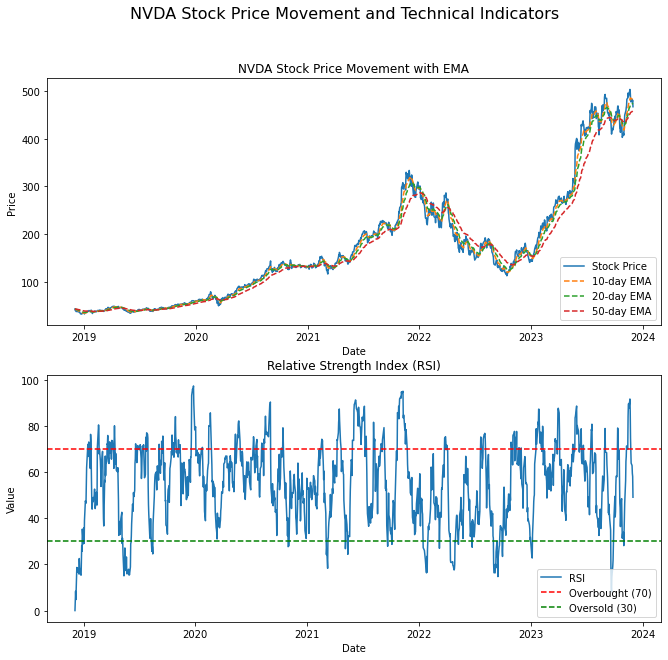

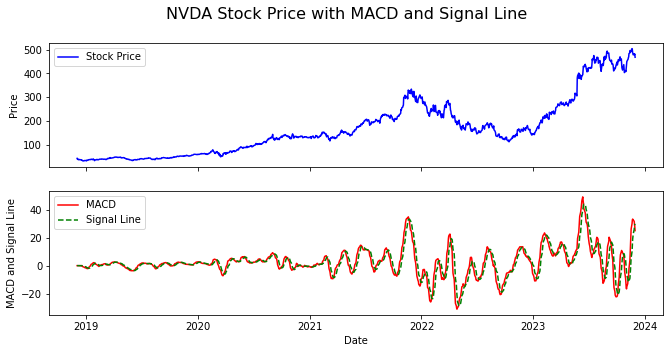

In [2]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import yfinance as yf

# Download historical data for NVDA from Yahoo Finance
ticker = "NVDA"
start_date = "2018-12-01"
end_date = "2023-12-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Exponential Moving Average EMA
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()  # 10-day EMA
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  # 20-day EMA
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()  # 50-day EMA

# Calculate MACD
data['Short_MA'] = data['Close'].rolling(window=12, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=26, min_periods=1).mean()
data['MACD'] = data['Short_MA'] - data['Long_MA']
data['Signal_Line'] = data['MACD'].rolling(window=9, min_periods=1).mean()

# Calculate RSI
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14, min_periods=1).mean()
avg_loss = loss.rolling(window=14, min_periods=1).mean()

rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data['RSI_Signal_Line'] = data['RSI'].rolling(window=9, min_periods=1).mean()

# Create a grid with 2 rows and 1 column
fig = plt.figure(figsize=(11, 10))
fig.suptitle(f'{ticker} Stock Price Movement and Technical Indicators', fontsize=16)

grid = GridSpec(2, 1, figure=fig)

# First graph for stock price and EMA
ax1 = fig.add_subplot(grid[0, 0])
ax1.plot(data.index, data['Close'], label='Stock Price')
ax1.plot(data.index, data['EMA_10'], label='10-day EMA', linestyle='--')
ax1.plot(data.index, data['EMA_20'], label='20-day EMA', linestyle='--')
ax1.plot(data.index, data['EMA_50'], label='50-day EMA', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title(f'{ticker} Stock Price Movement with EMA')
ax1.legend(loc='lower right')

# Second graph for RSI with overbought or oversold levels
ax2 = fig.add_subplot(grid[1, 0])
ax2.plot(data.index, data['RSI'], label='RSI')
ax2.axhline(70, color='r', linestyle='--', label='Overbought (70)')
ax2.axhline(30, color='g', linestyle='--', label='Oversold (30)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.set_title('Relative Strength Index (RSI)')
ax2.legend(loc='lower right')

# Creates two separate subplots for stock price and MACD, sharing the same x-axis.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5), sharex=True)
fig.suptitle(f'{ticker} Stock Price with MACD and Signal Line', fontsize=16)

# Plot stock price on the top subplot
ax1.plot(data.index, data['Close'], label='Stock Price', color='blue')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

# Plot MACD and Signal Line on the bottom subplot
ax2.plot(data.index, data['MACD'], label='MACD', color='red')
ax2.plot(data.index, data['Signal_Line'], label='Signal Line', linestyle='--', color='green')
ax2.set_xlabel('Date')
ax2.set_ylabel('MACD and Signal Line')
ax2.legend(loc='upper left')

## Diagnosis


We may need to do **feature extraction** on our dataset if one or more of the following conditions exist:
* If the current features are difficult to understand or interpret, extracting new features can sometimes provide more intuitive or meaningful representations.
* If a model is overfitting the training data, reducing the feature space can help the model generalize better to unseen data.
* If the dataset includes irrelevant or redundant features, it can degrade the performance of your model. Feature extraction helps in identifying and retaining only the relevant features.
* If your dataset has a large number of features (high-dimensional space), it can lead to issues like overfitting and increased computational complexity. Feature extraction can reduce dimensionality, making the dataset more manageable.
* When features have complex, non-linear relationships, traditional models might struggle to capture these patterns. Feature extraction techniques can transform the data into a form where these relationships are more apparent.

## Damage

If feature extraction is needed but not performed, several issues can arise, impacting the effectiveness and efficiency of data analysis or predictive modeling. Firstly, high dimensionality without proper feature extraction can lead to the curse of dimensionality, where models become overly complex and prone to overfitting, resulting in poor generalization to new data. Additionally, the presence of irrelevant or redundant features can degrade model performance, as the model might learn noise instead of the underlying patterns in the data. This also increases computational costs and complexity, making the model less efficient and more challenging to interpret. 

## Directions

If you're considering performing **feature extraction** on a dataset, you have various model options at your disposal, with **Principal Components Analysis (PCA)** and **Factor Analysis** being among the most popular. In the **Multicollinearity** section of this workbook, we have thoroughly explored how to implement **PCA**. In this **Directions** section, we'll outline the preparatory steps you need to take before applying PCA to your dataset.

**1) Define the Objective:** Clearly define what you want to achieve with the **PCA**. In our case, we want to extract meaning **features** for data analysis.

**2) Data Collection:** Acquire the relevant data. This could involve collecting new data or using an existing dataset that fits your objective.

**3) Data Cleaning:** Address missing values, outliers, and remove duplicates. Ensure your data is accurate and consistent. Convert all categorical data to a numerical format if necessary, as PCA requires numerical input.

**4) Data Preprocessing:** Standardize or normalize the data. PCA is affected by the scale of the features, so it’s crucial to scale features to have a mean of 0 and a standard deviation of 1.

**5) Exploratory Data Analysis:**  Conduct an exploratory analysis to understand the distributions, relationships, and structure of your data. Use statistical summaries and visualizations to get insights.

**6) Assess Suitability for PCA:** Check if PCA is suitable for your data. PCA works well when the features have **linear relationships** and the dataset has **high dimensionality**.

**7) Choose the PCA Model:** Depending on your data and software, choose the appropriate PCA model. This could include standard PCA, incremental PCA, randomized PCA, or kernel PCA for non-linear relationships.

**8) Implement PCA:** Once the data is ready and you have a clear understanding of its structure and your goals, apply PCA to transform your features into principal components. This step is beyond the scope of these preparatory steps and is covered in the **Multicollinearity** section.

## References
1. Cole Hagen, "Time Series Feature Extraction with Python and Pandas: Techniques and Examples", 28 Mar, https://medium.com/geekculture/time-series-feature-extraction-with-python-and-pandas-techniques-and-examples-2e2158de5356
2. Marty MK, "Relative Strength Index (RSI) in Python", https://www.qmr.ai/relative-strength-index-rsi-in-python/
3. Financial Python, "How to code an EMA crossover in Python", 25 Mar, https://medium.com/@financial_python/how-to-code-an-ema-crossover-in-python-96ecd22ae252
4. Financial Python, "Building a MACD Indicator in Python", 23 Sep, https://medium.com/@financial_python/building-a-macd-indicator-in-python-190b2a4c1777